<a href="https://colab.research.google.com/github/andiainundzariah/Skripsi/blob/master/Dataset5050.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#untuk menghubungkan colab ke drive

from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd #library yg digunakan untk load data set
import numpy as np  #library yg digunakan untk load data set
import os           #library yg digunakan untk load data set serta pengolahan dlm bentuk array

import matplotlib.pyplot as plt #library untuk visualisasi data, untu mmbuat grafik
import cv2    #mengolah data citra dikenal dngn opencv

#library ini ada didlm stckt learn
from sklearn.model_selection import train_test_split  #digunakn untuk membgi data training dan dta testing
from sklearn.preprocessing import StandardScaler      #untuk mrubh skala nilainya
from sklearn.neighbors import KNeighborsClassifier    #library untk knn

#library yg dgunakan untk mnghitung nilai performa
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

#library untuk mengolah data/ blm pasti 
from skimage import io
from skimage import feature

In [3]:
pneumonia_data = os.listdir('/content/drive/My Drive/Dataset/DATA5050/Pneumonia/')
print(pneumonia_data[:3])   #untuk mncetak hanya dta 3 trkhir sja
print(len(pneumonia_data)) #untuk mngethui bnyknya dt dlm vat

print('\n')
tidakPneumonia_data = os.listdir('/content/drive/My Drive/Dataset/DATA5050/Tidak Pneumonia/')
print(tidakPneumonia_data[:3])
print(len(tidakPneumonia_data))

['person63_bacteria_306.jpeg', 'person26_bacteria_122.jpeg', 'person69_bacteria_338.jpeg']
500


['IM-0656-0001.jpeg', 'IM-0655-0001.jpeg', 'IM-0652-0001.jpeg', 'IM-0654-0001.jpeg', 'IM-0651-0001.jpeg', 'IM-0652-0001-0002.jpeg', 'IM-0650-0001-0002.jpeg', 'IM-0648-0001.jpeg', 'IM-0650-0001.jpeg', 'IM-0650-0001-0001.jpeg', 'IM-0647-0001.jpeg', 'IM-0649-0001.jpeg', 'IM-0644-0001.jpeg', 'IM-0645-0001.jpeg', 'IM-0644-0001-0001.jpeg', 'IM-0644-0001-0002.jpeg', 'IM-0646-0001.jpeg', 'IM-0643-0001.jpeg', 'IM-0641-0001.jpeg', 'IM-0642-0001.jpeg', 'IM-0640-0001.jpeg', 'IM-0636-0001.jpeg', 'IM-0637-0001.jpeg', 'IM-0640-0001-0002.jpeg', 'IM-0640-0001-0001.jpeg', 'IM-0632-0001.jpeg', 'IM-0634-0001.jpeg', 'IM-0633-0001.jpeg', 'IM-0631-0001.jpeg', 'IM-0631-0001-0002.jpeg', 'IM-0635-0001.jpeg', 'IM-0630-0001.jpeg', 'IM-0631-0001-0001.jpeg', 'IM-0629-0001.jpeg', 'IM-0629-0001-0003.jpeg', 'IM-0629-0001-0002.jpeg', 'IM-0629-0001-0001.jpeg', 'IM-0628-0001.jpeg', 'IM-0625-0001.jpeg', 'IM-0626-0001-0001.jpeg

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

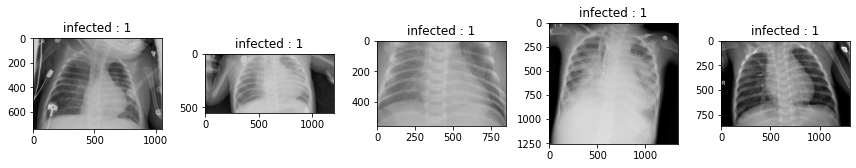

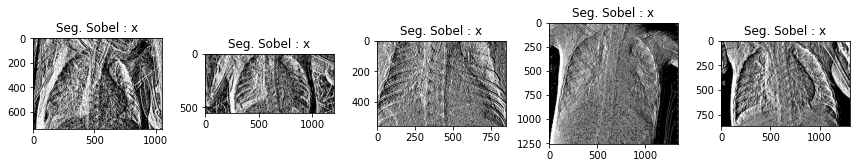

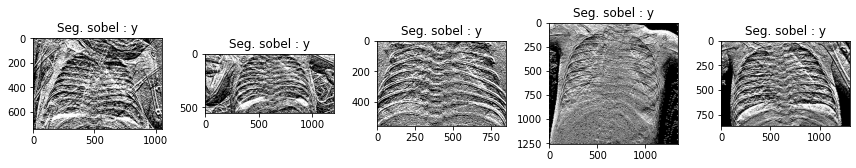

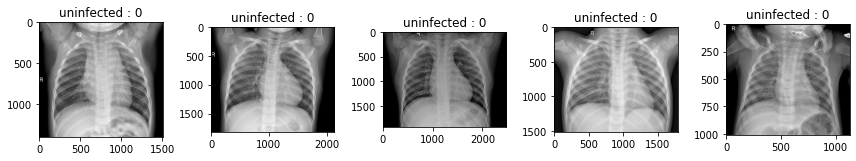

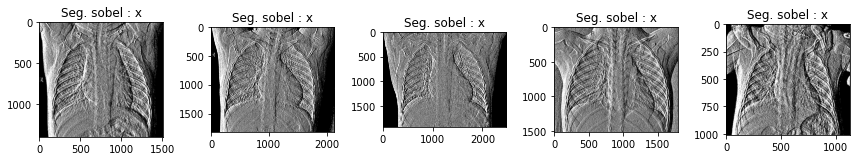

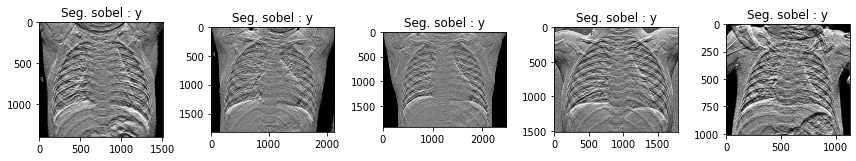

In [7]:
#Tahap ini hanya utk Visualisasi Citra Penyakit Pneumonia
#library matplotlib, hanya u/ visualisasi

#data asli pneumonia
plt.figure(figsize = (12,12))                #mengatur skala citra yg ditmpilkan dengan skala 12 12
for i in range(5):                           #melakukan perulangan sbnyk 5X (dgn nilai awal i=0 sampai i=4)
    plt.subplot(1, 5, i+1)                   #plot letak citra, librry cv2
    img = cv2.imread('/content/drive/My Drive/Dataset/DATA5050/Pneumonia' + "/" + pneumonia_data[i])
    plt.imshow(img)               #menanmpilkan data dlm format abu2
    plt.title('infected : 1')                  #pmbrian title, 1 itu memberikan nilai actual bahwa terinfeksi itu = 1
    plt.tight_layout()                        #tampilannya disesuaikan dgn lebar layar


#data sobel x pneumonia
plt.figure(figsize = (12,12))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = cv2.imread('/content/drive/My Drive/Dataset/DATA5050/Pneumonia' + "/" + pneumonia_data[i])
    #gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #img = cv2.GaussianBlur(img, (3,3),0)            #untuk menghilangkan noise dibuat buram      
    edges = cv2.Sobel(img, cv2.CV_32F,1,0)           #proses segmentasi sobel 
    plt.imshow(edges)
    plt.title('Seg. Sobel : x')
    plt.tight_layout()


#data sobel y
plt.figure(figsize= (12,12))
for i in range (5):
  plt.subplot(1, 5, i+1)
  img = cv2.imread ('/content/drive/My Drive/Dataset/DATA5050/Pneumonia' + "/" +pneumonia_data[i])
  #gray = cv2.cvtColor (img, cv2.COLOR_BGR2GRAY)
  #img = cv2.GaussianBlur(gray, (3,3), 0)
  edges = cv2.Sobel (img, cv2.CV_32F,0,1, ksize=5)
  plt.imshow(edges)
  plt.title ('Seg. sobel : y')
  plt.tight_layout()



#Tahap Visualisasi Citra Tidak Pneumonia
#data asli tdk pneumonia
plt.figure(figsize = (12,12))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = cv2.imread('/content/drive/My Drive/Dataset/DATA5050/Tidak Pneumonia' + "/" + tidakPneumonia_data[i])
    plt.imshow(img)
    plt.title('uninfected : 0')
    plt.tight_layout()

plt.figure(figsize = (12,12))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = cv2.imread('/content/drive/My Drive/Dataset/DATA5050/Tidak Pneumonia' + "/" + tidakPneumonia_data[i])
    #gray = cv2.cvtColor (img, cv2.COLOR_BGR2GRAY)
    #img = cv2.GaussianBlur (gray, (3,3),0)
    edges = cv2.Sobel(img, cv2.CV_32F,1,0)
    plt.imshow(edges)
    plt.title('Seg. sobel : x')
    plt.tight_layout()

plt.figure(figsize = (12,12))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = cv2.imread('/content/drive/My Drive/Dataset/DATA5050/Tidak Pneumonia' + "/" + tidakPneumonia_data[i])
    #gray = cv2.cvtColor (img, cv2.COLOR_BGR2GRAY)
    #img = cv2.GaussianBlur (gray, (3,3),0)
    edges = cv2.Sobel(img, cv2.CV_32F,0,1)
    plt.imshow(edges)
    plt.title('Seg. sobel : y')
    plt.tight_layout()
    
plt.show()

In [0]:
#SEGMENTASI SOBEL DAN EKSTRAKSI HUMOMENT

x = np.array([['H1','H2','H3','H4','H5','H6','H7','Target']])    #deklarasi var (x), isi datanya nnti sebagai header file .csv

#Proses Citra Pneumonia
for i in range(5):
    img = cv2.imread('/content/drive/My Drive/Dataset/DATA5050/Pneumonia' + "/" + pneumonia_data[i])
    edges = cv2.Sobel(img,cv2.CV_8U,1,0, ksize=5)
    edges = cv2.cvtColor(edges, cv2.COLOR_BGR2GRAY)
    a = cv2.HuMoments(cv2.moments(edges)).flatten()
    a = np.append(a,1)
    x = np.vstack((x,a))

#Proses Citra Tidak Pneumonia
for i in range(5):
    img = cv2.imread('/content/drive/My Drive/Dataset/DATA5050/Tidak Pneumonia' + "/" + tidakPneumonia_data[i])
    edges = cv2.Sobel(img,cv2.CV_8U,1,0)
    edges = cv2.cvtColor(edges, cv2.COLOR_BGR2GRAY)
    a = cv2.HuMoments(cv2.moments(edges)).flatten()
    a = np.append(a,0)
    x = np.vstack((x,a))

In [0]:
#EXPORT to CSV
np.savetxt("/content/drive/My Drive/Dataset/DATA5050/DatasetPneumonia5050.csv", x, fmt='%s',delimiter=',' )

In [11]:
#LOAD CSV DATASET

dataset = pd.read_csv('/content/drive/My Drive/Dataset/DATA5050/DatasetPneumonia5050.csv')
print (len(dataset))
print (dataset)

10
         H1            H2            H3  ...            H6            H7  Target
0  0.003228  2.162545e-06  1.301684e-09  ...  1.251875e-12 -1.804455e-20     1.0
1  0.004466  8.961931e-06  1.234836e-08  ...  3.198644e-11 -6.295602e-18     1.0
2  0.003184  1.890685e-06  2.820745e-10  ...  2.012647e-13 -2.060149e-20     1.0
3  0.003153  1.922017e-07  2.492227e-09  ... -3.837261e-13 -5.592650e-19     1.0
4  0.002676  1.048621e-06  9.450630e-10  ...  2.707833e-13 -1.344242e-20     1.0
5  0.022813  8.120259e-07  7.771195e-08  ... -1.354695e-11  6.219855e-16     0.0
6  0.025745  2.409404e-06  2.012945e-07  ...  4.938395e-11  3.101786e-15     0.0
7  0.024407  1.666061e-06  2.942772e-07  ... -2.279913e-11  1.929730e-15     0.0
8  0.026733  2.569089e-05  1.334839e-07  ...  2.034592e-10  1.285309e-15     0.0
9  0.022162  8.966570e-07  6.907721e-08  ...  4.604968e-12 -5.299695e-16     0.0

[10 rows x 8 columns]


In [12]:
#split target and attribute (membagi data)
x = dataset.iloc[:, 0:7] #mulai dr colmn index ke0, sbnyk 7 kolom(H1-H7) msuk ke var (X)
y = dataset.iloc[:, 7] #hny kolom index ke7 yg msuk ke var (Y)


#split train n test dataset
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=0, test_size=0.2)

print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

print(len(dataset))
x

8
2
8
2
10


,H1,H2,H3,H4,H5,H6,H7
0,0.003228,2.162545e-06,1.301684e-09,9.489906e-10,1.054586e-18,1.251875e-12,-1.804455e-20
1,0.004466,8.961931e-06,1.234836e-08,1.071164e-08,1.230328e-16,3.198644e-11,-6.295602e-18
2,0.003184,1.890685e-06,2.820745e-10,1.776018e-10,3.399641e-20,2.012647e-13,-2.060149e-20
3,0.003153,1.922017e-07,2.492227e-09,8.752996e-10,-1.165562e-18,-3.837261e-13,-5.592650e-19
4,0.002676,1.048621e-06,9.450630e-10,2.685739e-10,1.346395e-19,2.707833e-13,-1.344242e-20
5,0.022813,8.120259e-07,7.771195e-08,1.723264e-08,-1.040322e-16,-1.354695e-11,6.219855e-16
6,0.025745,2.409404e-06,2.012945e-07,3.629840e-08,-7.741938e-17,4.938395e-11,3.101786e-15
7,0.024407,1.666061e-06,2.942772e-07,2.355375e-08,-3.485669e-16,-2.279913e-11,1.929730e-15
8,0.026733,2.569089e-05,1.334839e-07,4.866858e-08,3.706173e-15,2.034592e-10,1.285309e-15
9,0.022162,8.966570e-07,6.907721e-08,1.613222e-08,9.562888e-17,4.604968e-12,-5.299695e-16


1.0    402
0.0    398
Name: Target, dtype: int64
0.0    102
1.0     98
Name: Target, dtype: int64


Text(0.5, 1.0, 'TESTING')

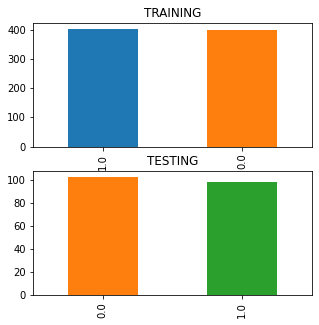

In [0]:
print(y_train.value_counts()) #mnmpilkn jum.data y_train brdsrkn value

print(y_test.value_counts())  #mnmpilkn jum.data y_test brdsrkn value


plt.figure(figsize=(5,5)) #mngtur ukuran skla grafik

#mnmpilkn visualisasi grafik
plt.subplot(2,1,1);y_train.value_counts().plot(kind='bar', color=['C0','C1','C2','C3','C4','C5','C6']);plt.title('TRAINING')
plt.subplot(2,1,2);y_test.value_counts().plot(kind='bar', color=['C1','C2','C3','C4','C5','C6']);plt.title('TESTING')

In [0]:
#scaling data
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)

x_test = sc_x.transform(x_test)
x_train

array([[ 0.03550745, -0.03537814, -0.03537746, ..., -0.03537746,
         0.03537746, -0.03537746],
       [ 0.03550745, -0.03537814, -0.03537746, ..., -0.03537746,
         0.03537746, -0.03537746],
       [ 0.03550745, -0.03537814, -0.03537746, ..., -0.03537746,
         0.03537746, -0.03537746],
       ...,
       [ 0.03550745, -0.03537814, -0.03537746, ..., -0.03537746,
         0.03537746, -0.03537746],
       [ 0.03550745, -0.03537814, -0.03537746, ..., -0.03537746,
         0.03537746, -0.03537746],
       [ 0.03550745, -0.03537814, -0.03537746, ..., -0.03537746,
         0.03537746, -0.03537746]])

In [0]:
math.sqrt(len(y_test))

14.142135623730951

In [0]:
#choose method knn and fitting
classifier = KNeighborsClassifier(n_neighbors=10,p=2,metric='euclidean')
classifier.fit (x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [0]:
#proses testing

#hasil prediksi/testing dismpn ke (y_pred)
y_pred = classifier.predict(x_test)
y_pred

array([0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.,
       1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0.,
       1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0.,
       0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1.,
       0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 1.,
       1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1.,
       0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1.,
       1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1.])

In [0]:
#print result
cm = confusion_matrix(y_test, y_pred)
print (cm)
print("Akurasi :" , accuracy_score(y_test, y_pred))
print("presisi :" , precision_score(y_test, y_pred))
print("recall :" , recall_score(y_test, y_pred, average=None))
print("F-Measure :" , f1_score(y_test, y_pred, average=None))

[[73 29]
 [52 46]]
Akurasi : 0.595
presisi : 0.6133333333333333
recall : [0.71568627 0.46938776]
F-Measure : [0.64317181 0.53179191]


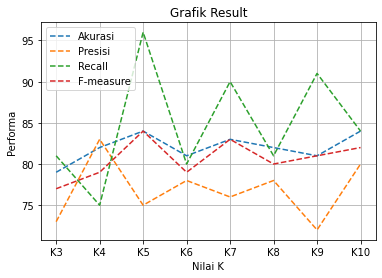

In [0]:
from matplotlib import pyplot as plt
x = ["K3", "K4", "K5", "K6", "K7", "K8", "K9", "K10"]
a = [79, 82, 84, 81, 83, 82, 81, 84]
p = [73, 83, 75, 78, 76, 78, 72, 80]
r = [81, 75, 96, 80, 90, 81, 91, 84]
f = [77, 79, 84, 79, 83, 80, 81, 82]
plt.plot(x, a, '--')
plt.plot(x, p, '--')
plt.plot(x, r, '--')
plt.plot(x, f, '--')
plt.title("Grafik Result")
plt.xlabel("Nilai K")
plt.ylabel("Performa")
plt.legend(["Akurasi", "Presisi", "Recall", "F-measure"])
plt.grid()
plt.show()